# Generate tidal record at oil spill locations from hdf5 inpute files

In [15]:
import tables
import xarray as xr
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def produce_tree(h5file):
    for i in h5file.walk_groups():
        print(i)    

In [4]:
produce_tree(t_vars)

/ (RootGroup) ''
/Results (Group) ''
/Time (Group) ''
/Results/salinity (Group) ''
/Results/temperature (Group) ''
/Results/water level (Group) ''


In [90]:
grid1 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02")
lat1 = grid1.latitude[1:897, 1:397].T
lon1= grid1.longitude[1:897, 1:397].T

In [80]:
def produce_record(t_vars, x,y, days):
    """" Plot tidal record and return start dates for each run
    arg t_vars: hdf5 file opened with pytables 
    arg x: x index
    arg y: y index
    arg days: days from start over which to find the minimum (low tide)
    """
    tides = []
    for i in range(168):
        attr = (5 - len(str(i + 1))) * "0" + str(i + 1)
        tides.append(getattr(getattr(t_vars.root.Results, 'water level'), f'water level_{attr}')[y][x])
    tides = np.asarray(tides)
    fig = plt.figure(figsize = (8,6))
    ax = plt.subplot(111)
    xrange = np.arange(168)
    plt.plot(xrange, tides)
    print('first run')
    index = np.where(tides[0:days] == tides[0:days].min())[0][0]
    print_time(t_vars, index)
    print('\nsecond run')
    print_time(t_vars, index + 6)
    ax.vlines(index, tides.min(), tides.max(), label = 'first run', colors = 'Red')
    ax.vlines(index + 6, tides.min(), tides.max(), label = 'second run', colors = 'Blue')
    plt.xlabel('hour index')
    plt.ylabel('sea surface height (m)')
    plt.legend()

In [65]:
def print_time(f, t):
    t = t + 1
    attr = (5-len(str(t))) * "0" + str(t)
    time = getattr(f.root.Time, f'Time_{attr}')
    print(np.asarray(time).astype(int))
    print(t)

# SoG point indices

In [91]:
np.where(lon1 == -123.66905975341797)

(array([251]), array([473]))

In [94]:
y = 251
x = 473

## Run ID SOG12117

first run
[2017   12    1    5   30    0]
6

second run
[2017   12    1   11   30    0]
12


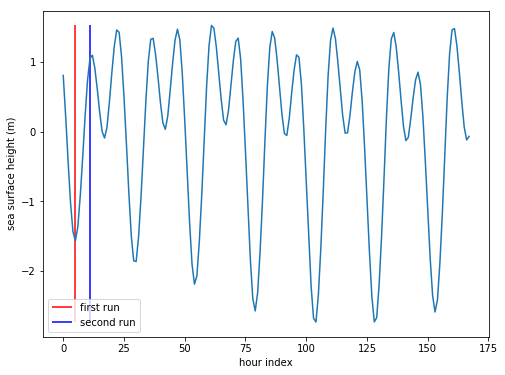

In [95]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/SoG/SOG12117/t.hdf5')
produce_record(t_vars, x,y, 15)

## Run ID SOG092517

first run
[2017    9   25   10   30    0]
11

second run
[2017    9   25   16   30    0]
17


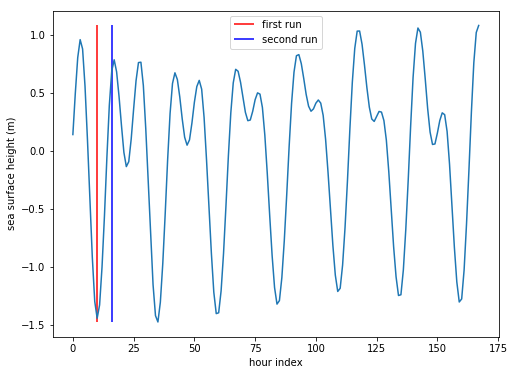

In [96]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/SoG/SOG092517/t.hdf5')
produce_record(t_vars, x,y, 15)

# Turn Point indices

In [97]:
np.where(lon1 == -123.24085235595703)

(array([123, 249, 258]), array([144, 342, 356]))

In [98]:
np.where(lat1 == 48.691226959228516)

(array([249]), array([342]))

In [99]:
y = 249
x = 342

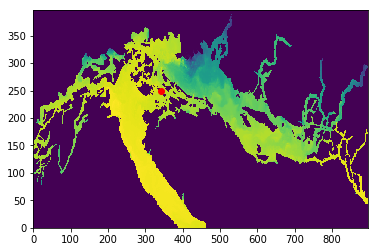

In [100]:
plt.pcolormesh(t_vars.root.Results.salinity.salinity_00001[39])
plt.plot([x], [y], 'ro')

first run
[2017    6   15   21   30    0]
22

second run
[2017    6   16    3   30    0]
28


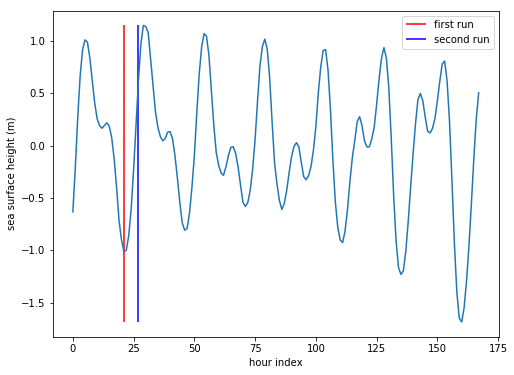

In [101]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/TurnPoint/TP061517_7/t.hdf5')
produce_record(t_vars, x,y, 25)

first run
[2017   11   21    7   30    0]
8

second run
[2017   11   21   13   30    0]
14


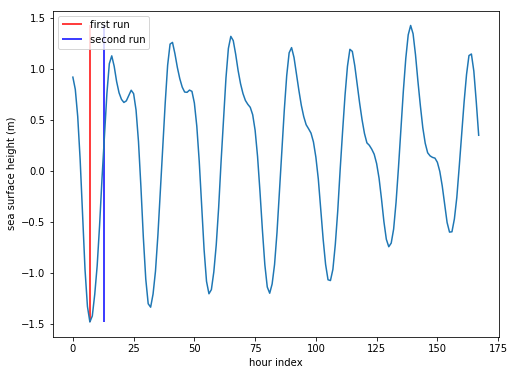

In [102]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/TurnPoint/TP112117_7/t.hdf5')
produce_record(t_vars, x,y, 15)

In [105]:
print_time(t_vars, 167)

[2017   11   27   23   30    0]
168


# Salmon Bank Indices

In [106]:
np.where(lon1 == -122.85613250732422)

(array([267]), array([255]))

In [107]:
np.where(lat1 == 48.38138198852539)

(array([267]), array([255]))

In [108]:
y = 255
x = 267

first run
[2017    8    1   13   30    0]
14

second run
[2017    8    1   19   30    0]
20


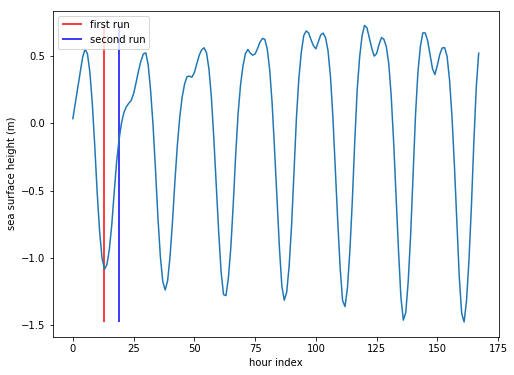

In [110]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/SB080117_7/t.hdf5')
produce_record(t_vars, x,y, 15)

In [112]:
print_time(t_vars, 167)

[2017    8    7   23   30    0]
168


In [119]:
t_vars = tables.open_file('/results2/MIDOSS/forcing/SalishSeaCast/MF0/SB120718_7/ww3.hdf5')
#produce_record(t_vars, x,y, 15)

In [114]:
print_time(t_vars, 167)

[2018   12   13   23   30    0]
168


In [122]:
np.asarray(t_vars.root.Time.Time_00336)

array([2018.,   12.,   13.,   23.,   30.,    0.])

In [123]:
getattr(t_vars.root.Results, 'mean wave period')

/Results/mean wave period (Group) ''
  children := ['mean wave period_00001' (CArray), 'mean wave period_00002' (CArray), 'mean wave period_00003' (CArray), 'mean wave period_00004' (CArray), 'mean wave period_00005' (CArray), 'mean wave period_00006' (CArray), 'mean wave period_00007' (CArray), 'mean wave period_00008' (CArray), 'mean wave period_00009' (CArray), 'mean wave period_00010' (CArray), 'mean wave period_00011' (CArray), 'mean wave period_00012' (CArray), 'mean wave period_00013' (CArray), 'mean wave period_00014' (CArray), 'mean wave period_00015' (CArray), 'mean wave period_00016' (CArray), 'mean wave period_00017' (CArray), 'mean wave period_00018' (CArray), 'mean wave period_00019' (CArray), 'mean wave period_00020' (CArray), 'mean wave period_00021' (CArray), 'mean wave period_00022' (CArray), 'mean wave period_00023' (CArray), 'mean wave period_00024' (CArray), 'mean wave period_00025' (CArray), 'mean wave period_00026' (CArray), 'mean wave period_00027' (CArray), 'me